In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [75]:
img0 = cv2.imread('num7.png')
img0 = cv2.bitwise_not(img0)
img0 = cv2.copyMakeBorder(img0,10,10,10,10
                          ,cv2.BORDER_CONSTANT,value=0)
img = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
ws = img.copy()

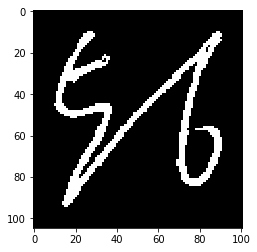

In [76]:
ws = cv2.threshold(ws, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
plt.imshow(ws,'gray')

In [83]:
kernel_watershed = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(ws, cv2.MORPH_OPEN, kernel_watershed, iterations = 2)

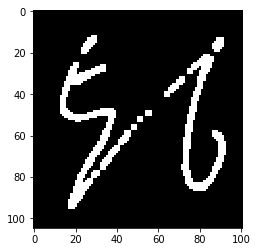

In [84]:
plt.imshow(opening,'gray')

In [85]:
sure_bg = cv2.dilate(opening, kernel_watershed,iterations = 4)

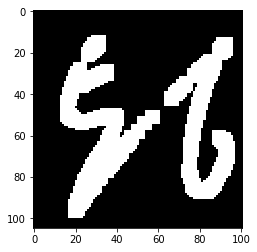

In [86]:
plt.imshow(sure_bg,'gray')

In [111]:
dist_transtorm = cv2.distanceTransform(opening, 1, 5)
ret, sure_fg = cv2.threshold(dist_transtorm, 0.3*dist_transtorm.max(), 255, 0)

In [112]:
sure_fg = np.uint8(sure_fg)

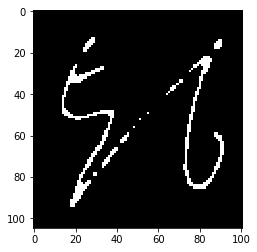

In [113]:
plt.imshow(sure_fg, 'gray')

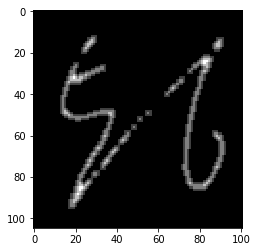

In [114]:
plt.imshow(dist_transtorm,'gray')

In [115]:
unkown = cv2.subtract(sure_bg,sure_fg)

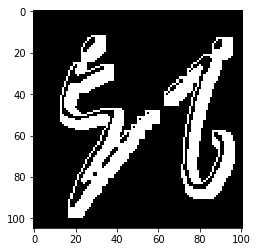

In [116]:
plt.imshow(unkown, 'gray')

In [117]:
ret, markers1 = cv2.connectedComponents(sure_fg)

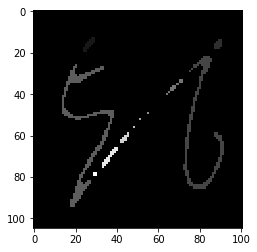

In [118]:
plt.imshow(markers1, 'gray')

In [119]:
markers = markers1 + 1

In [120]:
markers[unkown == 255] = 0 

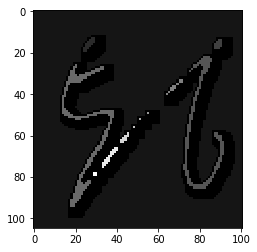

In [121]:
plt.imshow(markers, 'gray')

In [122]:
marker3 = cv2.watershed(img0, markers)

In [123]:
marker3 

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ..., 
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [124]:
img0[marker3 == -1] = [255, 0, 0]

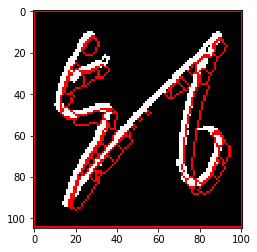

In [125]:
plt.imshow(img0)

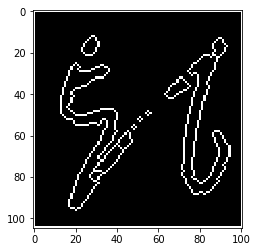

In [126]:
bkg = img.copy()
bkg[:] = 0
bkg[marker3 == -1] = 255
plt.imshow(bkg,'gray')

In [127]:
cnts = cv2.findContours(bkg, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)[1]

In [128]:
num_cnts = []

In [129]:
for cnt in cnts:
    if cv2.contourArea(cnt) > 150 and cv2.contourArea(cnt) < 8000:
        num_cnts.append(cnt)

In [73]:
bkg_draw = cv2.cvtColor(bkg, cv2.COLOR_GRAY2BGR)

In [28]:
cv2.drawContours(bkg_draw, num_cnts, -1, (255,0,0),thickness = -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       ..., 
       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,

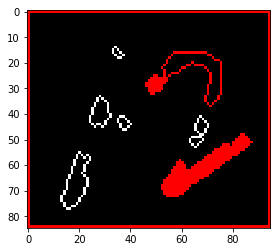

In [29]:
plt.imshow(bkg_draw)